In [3]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn
!pip install scipy
!pip install opencv-python
!pip install opencv-python-headless

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
# from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [4]:
import os
import csv
import numpy as np
from PIL import Image

# Paths to dataset directories
train_dir = r"C:\Users\dell\Downloads\fer2013\train"
test_dir = r"C:\Users\dell\Downloads\fer2013\test"

# Map emotion labels to numerical values
emotions_mapping = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5,
    "neutral": 6
}

# Function to process images and get data
def process_images(directory, usage):
    data = []
    for label, emotion_id in emotions_mapping.items():
        emotion_dir = os.path.join(directory, label)
        if os.path.isdir(emotion_dir):
            for file in os.listdir(emotion_dir):
                file_path = os.path.join(emotion_dir, file)
                try:
                    # Load the image and resize to 48x48 (FER-2013 default size)
                    img = Image.open(file_path).convert('L')  # Convert to grayscale
                    img = img.resize((48, 48))
                    
                    # Flatten pixel values and convert to a space-separated string
                    pixels = np.array(img).flatten()
                    pixels_str = ' '.join(map(str, pixels))
                    
                    # Append data [emotion_id, pixels_str, usage]
                    data.append([emotion_id, pixels_str, usage])
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
    return data

# Process train and test data
train_data = process_images(train_dir, "Training")
test_data = process_images(test_dir, "PublicTest")  # Typically "PublicTest" is used for test data

# Combine train and test data
all_data = train_data + test_data

# Save to CSV
csv_file = 'fer2013_processed.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['emotion', 'pixels', 'Usage'])  # Header
    writer.writerows(all_data)

print(f"CSV file created successfully: {csv_file}")


CSV file created successfully: fer2013_processed.csv


Preprocess all train images

In [5]:

# Reading Dataset
data = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\fer2013_processed.csv')
data.head(10)


,emotion,pixels,Usage
0,0,50 32 15 11 12 10 10 8 15 10 7 7 6 5 5 6 8 4 6...,Training
1,0,29 24 29 11 15 22 26 11 7 17 29 23 25 37 47 50...,Training
2,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Training
3,0,155 138 98 112 94 97 111 107 101 84 83 90 86 1...,Training
4,0,211 215 220 221 219 216 213 210 207 205 202 20...,Training
5,0,36 37 34 40 54 65 67 57 48 50 49 35 61 122 141...,Training
6,0,34 31 32 31 25 30 40 41 40 37 57 87 114 130 13...,Training
7,0,102 104 102 101 104 105 103 101 104 103 108 11...,Training
8,0,133 117 114 124 148 169 152 134 161 158 145 11...,Training
9,0,185 187 190 183 197 147 39 23 21 38 40 48 49 3...,Training


In [6]:
# Checking Shape of data
data.shape

(34125, 3)

In [7]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

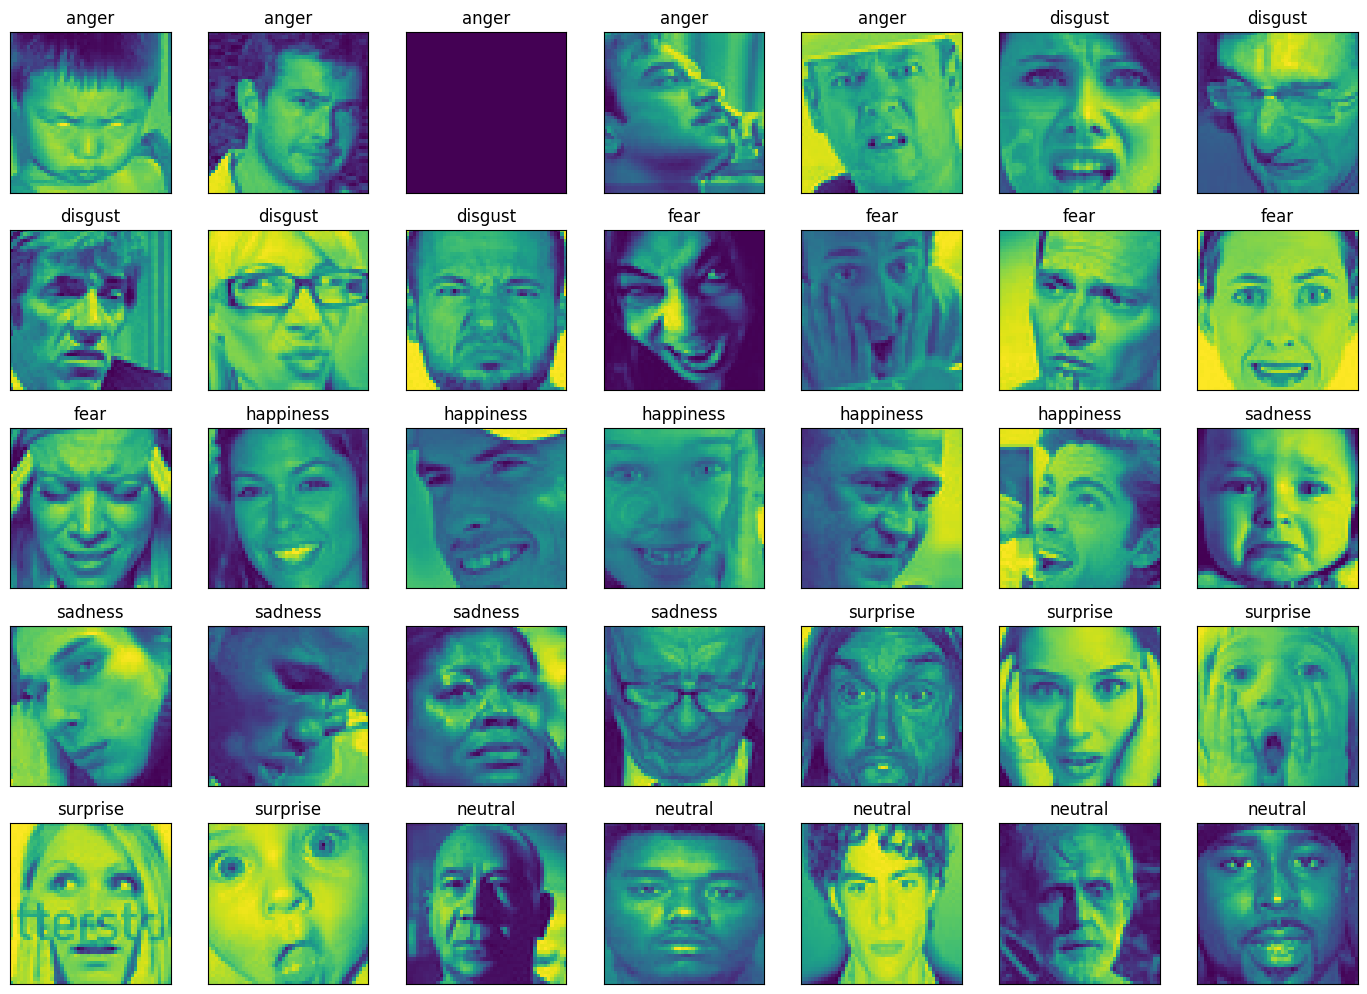

In [8]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(data.emotion.unique()):
    for j in range(5):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    2240
1     547
Name: count, dtype: int64


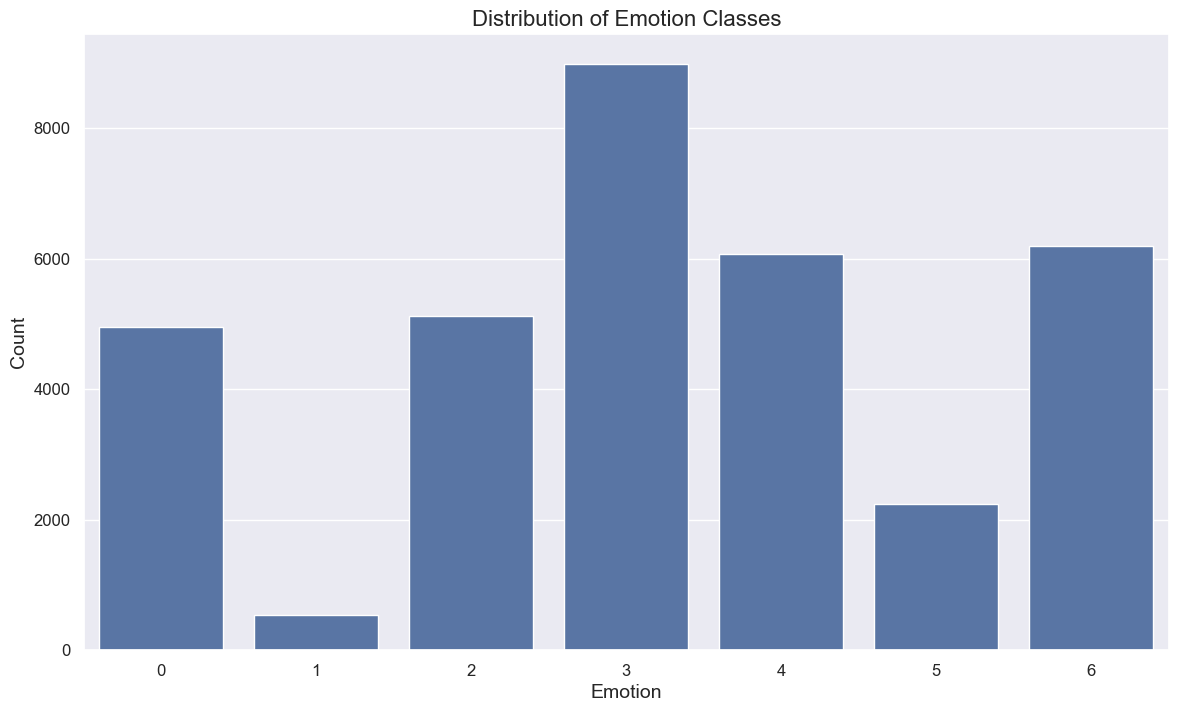

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking Emotion Class Distribution
emotion_counts = data['emotion'].value_counts()
print(emotion_counts)

# Plotting the above distribution
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

# Adding labels to the plot
plt.title("Distribution of Emotion Classes", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.show()


In [10]:
# Split the data into feature & target variable
x_data = data['pixels']
y_data = data['emotion']

In [11]:
# Ensure x_data is a NumPy array before flattening
x_data = np.array(x_data)

# Flatten the data
x_data = x_data.flatten()

# Convert each row of pixel data to string and then split it
x_data = np.array([np.fromstring(str(px), sep=' ', dtype='float32') for px in x_data])

# Normalize the pixel values by dividing by 255
x_data /= 255.0

# Reshape to (num_samples, 48, 48, 1) for compatibility with CNN
x_data = x_data.reshape(-1, 48, 48, 1)

# Check the shape after reshaping
print(x_data.shape)


(34125, 48, 48, 1)


In [12]:
# Reshaping
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(34125, 48, 48, 1)

In [13]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(34125, 1)

In [14]:
# Split the data and create train-test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)
     

In [15]:
# Perform Random Over Sampling to balance the data
oversampler = RandomOverSampler(sampling_strategy='auto')

# Remove `.values` as x_data is already a NumPy array
x_data, y_data = oversampler.fit_resample(x_data.reshape(-1, 1), y_data)

print(x_data.shape, " ", y_data.shape)


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(78652798, 1)   (62923,)


In [16]:
import pandas as pd

# Convert y_data to a pandas Series and then call value_counts
pd.Series(y_data).value_counts()


0    8989
1    8989
2    8989
3    8989
4    8989
5    8989
6    8989
Name: count, dtype: int64

In [17]:
x_data = pd.Series(x_data.flatten())
x_data

0           0.196078
1           0.125490
2           0.058824
3           0.043137
4           0.047059
              ...   
78652793    0.062745
78652794    0.619608
78652795    0.549020
78652796    0.250980
78652797    0.603922
Length: 78652798, dtype: float32

In [18]:
import numpy as np

# Normalize the data
x_data = np.array(x_data, dtype=np.float32)  # Ensure x_data is a NumPy array of floats
x_data /= 255  # Normalize by dividing by 255

# Display the first 10 rows
print(x_data[:10])


[0.00076894 0.00049212 0.00023068 0.00016917 0.00018454 0.00015379
 0.00015379 0.00012303 0.00023068 0.00015379]


In [19]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30712, 48, 48, 1), (3413, 48, 48, 1), (30712, 1), (3413, 1))

In [20]:
# Import to_categorical directly from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Perform One-Hot Encoding on training data
y_train = to_categorical(y_train, 7)
y_train.shape


(30712, 7)

In [21]:

from tensorflow.keras.utils import to_categorical

# Perform One-Hot Encoding on test data
y_test = to_categorical(y_test, 7)
y_test.shape

     

(3413, 7)

In [22]:
model = Sequential([
    # 1st Conv Layer
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 2nd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 3rd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 4th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 5th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # Flattening the Layer
    Flatten(),

    # Hidden Layer
    Dense(250, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(7, activation = 'softmax')
])

In [23]:


model.summary()
     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       512,250 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 792,855 (3.02 MB)

 Trainable params: 792,023 (3.02 MB)

 Non-trainable params: 832 (3.25 KB)

5. Model Training

In [24]:
!pip install graphviz pydot --upgrade


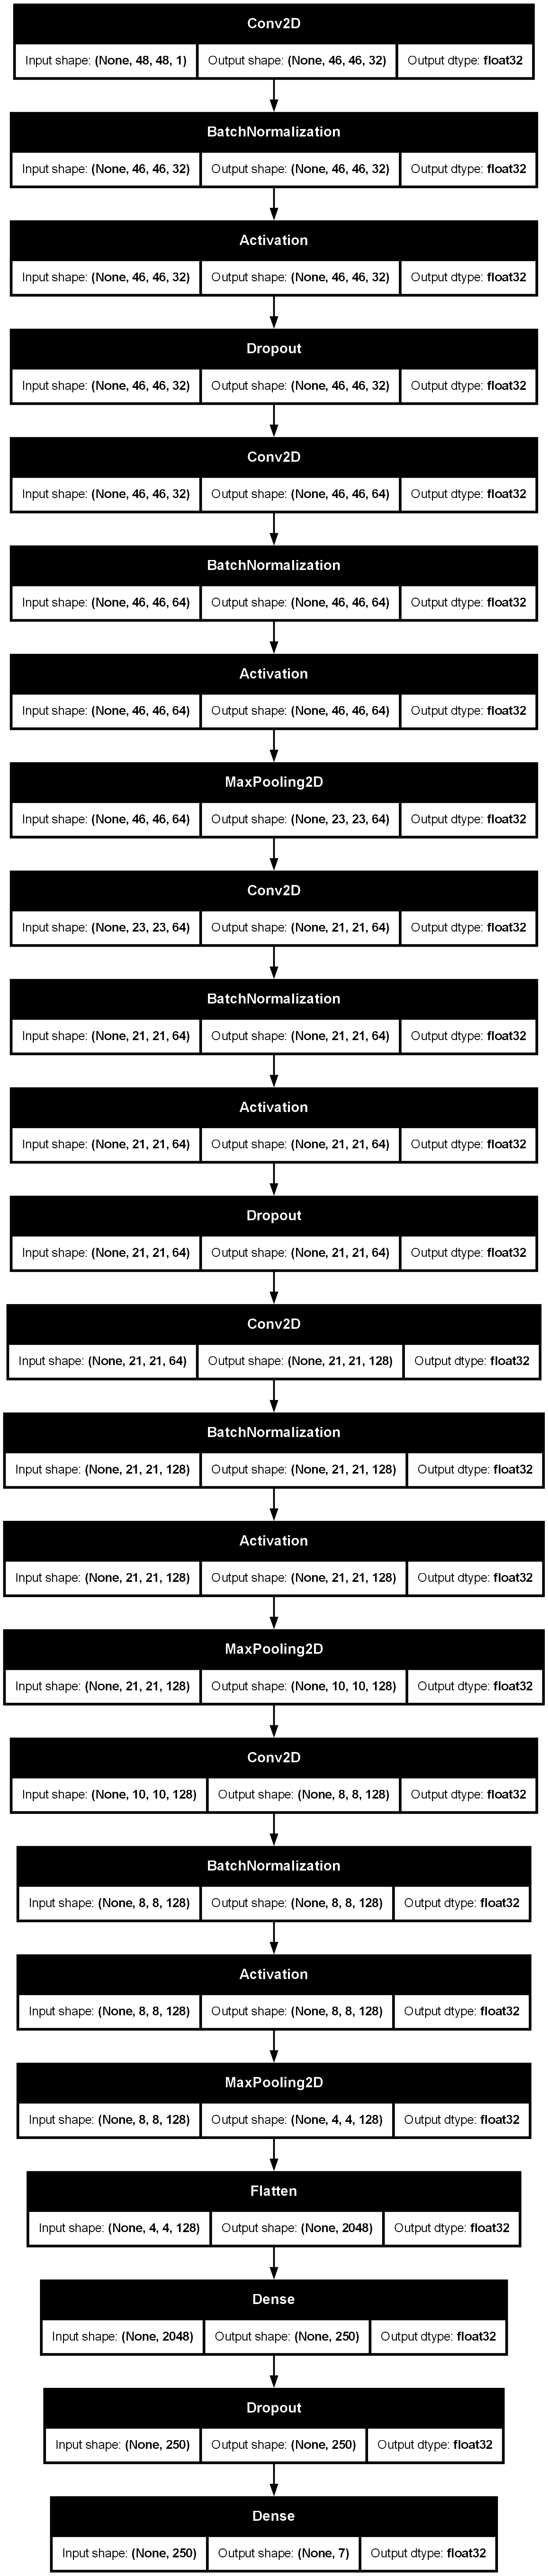

In [25]:
# Method 1: Using a raw string
tf.keras.utils.plot_model(
    model, 
    to_file=r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\best_model.png", 
    show_shapes=True, 
    show_dtype=True
)

In [26]:
# Compile the Model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Paths for the model and weights
model_json_path = r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\Facial Expression Recognition.json"
weights_path = r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\fer.weights.h5"

# Check if the model and weights already exist
if os.path.exists(model_json_path) and os.path.exists(weights_path):
    # Load model
    model = model_from_json(open(model_json_path, "r").read())
    
    # Load weights
    model.load_weights(weights_path)
    print("Model and weights loaded successfully.")
else:
    # Load and prepare data here (x_train, y_train, x_test, y_test)
    # Example: x_train, y_train, x_test, y_test = your_data_loading_function()

    # Train the model if the model or weights do not exist
    history = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test))

    # Save the model
    model_json = model.to_json()
    with open(model_json_path, "w") as json_file:
        json_file.write(model_json)
    
    # Save weights
    model.save_weights(weights_path)
    print("Model trained and saved.")


Model and weights loaded successfully.


Model Evaluation

In [32]:
print("Accuracy of our model on test data : " , model.evaluate(x_test, y_test)[1]*100 , "%")
print("Loss of our model on test data : " , model.evaluate(x_test, y_test)[0])

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6137 - loss: 1.0816
Accuracy of our model on test data :  60.73835492134094 %
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6137 - loss: 1.0816
Loss of our model on test data :  1.0848952531814575


In [36]:
plt.figure(figsize=(15, 9))

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

<Figure size 1500x900 with 0 Axes>

In [35]:
plt.figure(figsize=(15, 9))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

<Figure size 1500x900 with 0 Axes>

Getting Classification Report & Plotting Confusion Matrix

In [41]:
# Making Predictio on Test Data
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step


[3, 3, 6, 3, 4, 3, 1, 5, 3, 3]

In [42]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[3, 3, 6, 3, 3, 3, 0, 2, 3, 5]

In [43]:
# Getting Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       416
           1       0.79      0.55      0.65        42
           2       0.78      0.50      0.61       397
           3       0.94      0.95      0.94       749
           4       0.65      0.84      0.73       450
           5       0.80      0.85      0.82       149
           6       0.50      0.66      0.57       102

    accuracy                           0.78      2305
   macro avg       0.75      0.72      0.72      2305
weighted avg       0.79      0.78      0.78      2305



Text(179.75, 0.5, 'Truth')

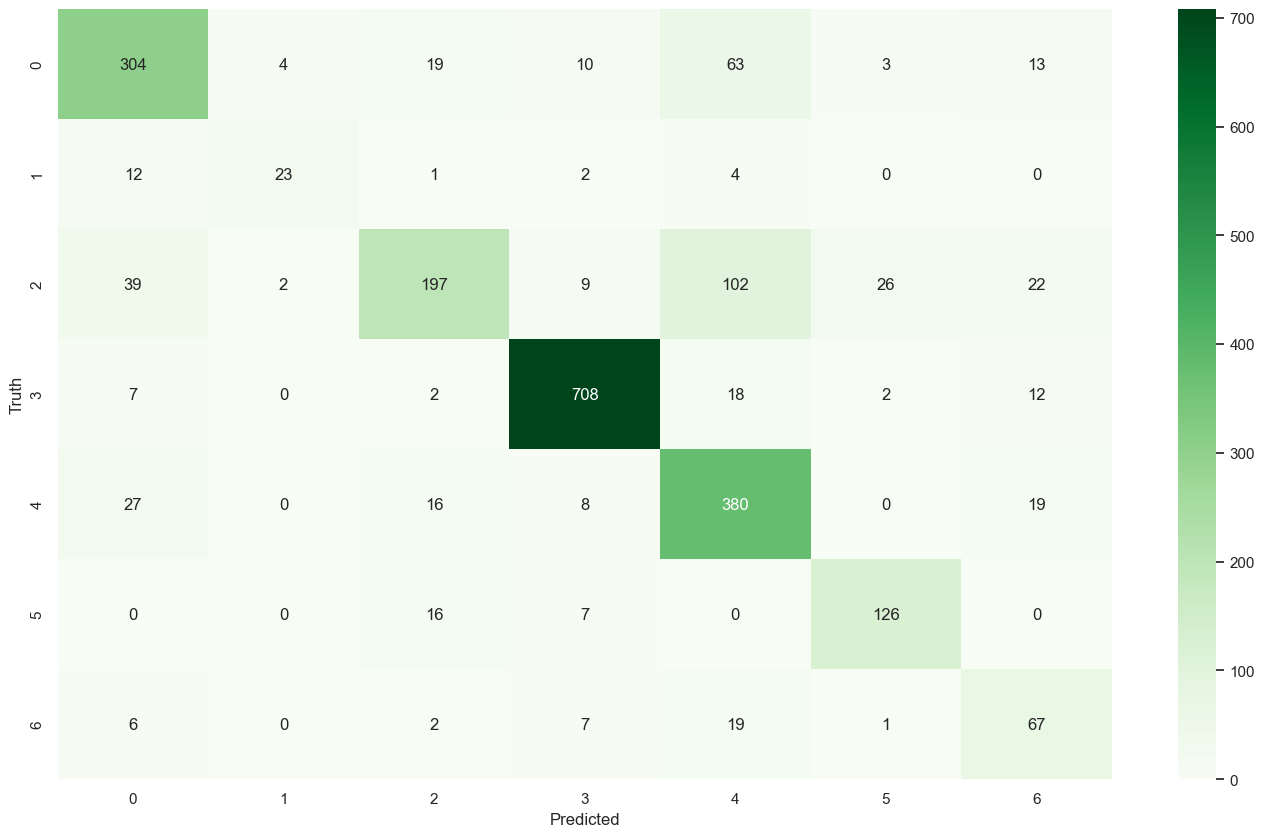

In [44]:
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (17, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
model.save(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\Facial_Expression_Detection_System.hdf5")


In [3]:
# Saving the model to use it later on
fer_json = model.to_json()
with open(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\Facial Expression Recognition.json", "w") as json_file:
    json_file.write(fer_json)

# Save the weights with the correct filename extension
model.save_weights(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\fer.weights.h5")


In [6]:
import cv2
print(cv2.__version__)


4.10.0


Making Prediction in a Real-Time

In [41]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Load model
try:
    with open(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\Facial Expression Recognition.json", "r") as json_file:
        model = model_from_json(json_file.read())
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load weights
try:
    model.load_weights(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\fer.weights.h5")
    print("Weights loaded successfully.")
except Exception as e:
    print(f"Error loading weights: {e}")
    exit()

# Load Haar Cascade for face detection
face_haar_cascade = cv2.CascadeClassifier(r"C:\Users\dell\OneDrive\Desktop\Projects\Emotion Detection\haarcascade_frontalface_default.xml")
if face_haar_cascade.empty():
    print("Error loading Haar Cascade.")
    exit()

# Start video capture
cap = cv2.VideoCapture(0)

# Check if webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Set webcam resolution
cap.set(3, 640)  # Set width
cap.set(4, 480)  # Set height

while True:
    ret, test_img = cap.read()  # Captures frame and returns boolean value and captured image
    if not ret:
        print("Failed to capture image. Exiting...")
        break
    
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
    
    for (x, y, w, h) in faces_detected:
        # Draw rectangle around face
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        
        # Crop the face region
        roi_gray = gray_img[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48))  # Resize to 48x48 for emotion detection
        
        # Preprocess the image for model prediction
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255  # Normalize the pixel values
        
        # Predict emotion
        predictions = model.predict(img_pixels)
        
        # Get the emotion with the highest probability
        max_index = np.argmax(predictions[0])
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]
        
        # Display predicted emotion on the frame
        cv2.putText(test_img, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Resize image for better display
    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial Emotion Analysis', resized_img)

    # Exit on 'q' key press
    if cv2.waitKey(10) == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Model loaded successfully.
Weights loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33m